# Read the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('csv-27940.csv', sep=';', on_bad_lines='skip')
df.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,cian.ru,55.631803,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583


In [3]:
df['Дата'].min()

'2022-03-01 09:31:00'

In [4]:
df['Дата'].max()

'2025-02-27 23:34:28'

In [5]:
df['Доп.параметры'][0]

'Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=4 кв. 2022|Название ЖК=Румянцево-Парк|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Монолитный|Этаж=21|Этажей в доме=22|Площадь=52.9'

In [6]:
df['Доп.параметры'][1]

'Площадь кухни=0|Жилая площадь=0|Срок сдачи=1 кв. 2017|Название ЖК=Санрайс|Тип объявления=Продам|Количество комнат=Студия|Вид объекта=Вторичка|Тип дома=Монолитный|Этаж=7|Этажей в доме=17|Площадь=35.6'

In [7]:
df['Доп.параметры'][12]

'Площадь кухни=5.8|Жилая площадь=29.0|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Блочный|Этаж=7|Этажей в доме=12|Площадь=44.2'

In [8]:
df['Доп.параметры'][333]

'Площадь кухни=16.8|Жилая площадь=43.2|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Этаж=20|Этажей в доме=47|Площадь=65.0'

## We filter only new listings (from the last 3 months) for regression analysis.

In [9]:
#For time series
df1 = df 

# Parsing additional attributes

In [10]:
import re

In [11]:
pattern_kitchen = 'Площадь кухни=(.*?)\|.*?'
df1['kitchen'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_kitchen, x).group(1) if re.search(pattern_kitchen, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,55.631803,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0


In [12]:
pattern_living_sqm = 'Жилая площадь=(.*?)\|.*?'
df1['living_sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_living_sqm, x).group(1) if re.search(pattern_living_sqm, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,37.419269,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0


In [13]:
pattern_material = 'Тип дома=(.*?)\|.*?'
df1['material'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_material, x).group(1) if re.search(pattern_material, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,NaN,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный


In [14]:
pattern_floor = 'Этаж=(.*?)\|.*?'
df1['floor'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_floor, x).group(1) if re.search(pattern_floor, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,Площадь кухни=12.0|Жилая площадь=0|Срок сдачи=...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21


In [15]:
pattern_n_floors = 'Этажей в доме=(.*?)\|.*?'
df1['n_floors'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_floors, x).group(1) if re.search(pattern_n_floors, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,https://www.cian.ru/sale/flat/314274422,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22


In [16]:
pattern_fin_date = 'Срок сдачи=(.*?)\|.*?'
df1['fin_date'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_fin_date, x).group(1) if re.search(pattern_fin_date, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,https://images.cdn-cian.ru/images/kvartira-mos...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022


In [17]:
pattern_n_rooms = 'Количество комнат=(.*?)\|.*?'
df1['n_rooms'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_n_rooms, x).group(1) if re.search(pattern_n_rooms, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date,n_rooms
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,г. Москва и Московская область,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022,2


In [18]:
df1['Доп.параметры'] = df['Доп.параметры'] + "|"
pattern_sqm = 'Площадь=(.*?)\|.*?'
df1['sqm'] = df1['Доп.параметры'].apply(lambda x: re.search(pattern_sqm, x).group(1) if re.search(pattern_sqm, x) else None)
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Номер подменён,"Расстояние до метро, км",kitchen,living_sqm,material,floor,n_floors,fin_date,n_rooms,sqm
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,да,1.583,12.0,0,Монолитный,21,22,4 кв. 2022,2,52.9


## OHC for the type of the house

In [19]:
df1[['Блочный','Деревянный','Кирпичный','Монолитно-кирпичный','Монолитный','Неизвестный','Панельный','Сталинский']] = pd.get_dummies(df1.material)

In [20]:
df1.head(1)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,n_rooms,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский
0,"2-к кв. Москва Родниковая ул., 30к3 (52.9 м²)",14499999,2025-02-27 23:34:28,89670317409,Вымпел-Коммуникации,Жанна Пойтина (Частный маклер),Агентство,Москва,Москва,Саларьево,...,2,52.9,False,False,False,False,True,False,False,False


## Only used attributes

In [21]:
df1.columns

Index(['Название', 'Цена', 'Дата', 'Телефон', 'Оператор',
       'Контактное лицо (автор объявления)', 'Тип автора', 'Регион', 'Город',
       'Метро/Район', 'Адрес', 'Описание', 'Тип объявления', 'Категория1',
       'Категория2', 'ID на сайте', 'Источник', 'lat', 'lng',
       'Персона для контактов', 'Доп.параметры', 'URL', 'Ссылки на картинки',
       'Регион мобильного телефона', 'Номер подменён',
       'Расстояние до метро, км', 'kitchen', 'living_sqm', 'material', 'floor',
       'n_floors', 'fin_date', 'n_rooms', 'sqm', 'Блочный', 'Деревянный',
       'Кирпичный', 'Монолитно-кирпичный', 'Монолитный', 'Неизвестный',
       'Панельный', 'Сталинский'],
      dtype='object')

In [22]:
df1 = df1[['Цена', 'Дата', 'lat', 'lng', 'Расстояние до метро, км', 'kitchen', 'living_sqm', 'floor',
       'n_floors', 'fin_date', 'n_rooms', 'sqm', 'Блочный', 'Деревянный',
       'Кирпичный', 'Монолитно-кирпичный', 'Монолитный', 'Неизвестный',
       'Панельный', 'Сталинский']]

df1.head(1)

,Цена,Дата,lat,lng,"Расстояние до метро, км",kitchen,living_sqm,floor,n_floors,fin_date,n_rooms,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,2,52.9,False,False,False,False,True,False,False,False


In [23]:
df1['sqm_price'] = round(df1['Цена'] / df1['sqm'].astype(float), 2)
df1.head(1)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_17484\3961048787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqm_price'] = round(df1['Цена'] / df1['sqm'].astype(float), 2)


,Цена,Дата,lat,lng,"Расстояние до метро, км",kitchen,living_sqm,floor,n_floors,fin_date,...,sqm,Блочный,Деревянный,Кирпичный,Монолитно-кирпичный,Монолитный,Неизвестный,Панельный,Сталинский,sqm_price
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,52.9,False,False,False,False,True,False,False,False,274102.06


In [24]:
df1.columns

Index(['Цена', 'Дата', 'lat', 'lng', 'Расстояние до метро, км', 'kitchen',
       'living_sqm', 'floor', 'n_floors', 'fin_date', 'n_rooms', 'sqm',
       'Блочный', 'Деревянный', 'Кирпичный', 'Монолитно-кирпичный',
       'Монолитный', 'Неизвестный', 'Панельный', 'Сталинский', 'sqm_price'],
      dtype='object')

In [25]:
df1 = df1.rename(columns={"Цена": "price",
                         'Дата': 'date',
                         'Метро/Район':'district',
                         'Расстояние до метро, км': "to_subway",
                         'Блочный': 'is_block',
                         'Деревянный': 'is_wooden',
                         'Кирпичный': 'is_brick',
                         'Неизвестный': 'is_unknown',
                         'Панельный': 'is_panel',
                         'Монолитно-кирпичный': 'is_monolithic_block',
                         'Монолитный': 'is_monolithic',
                         'Сталинский': 'is_stalin'})
df1.head(1)

,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,fin_date,...,sqm,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,52.9,False,False,False,False,True,False,False,False,274102.06


In [26]:
### additional attribute for studio apartments

df1['is_studio'] = df1['n_rooms'].where(df1['n_rooms'] == 'Студия', 0)
df1['is_studio'] = df1['is_studio'].replace('Студия', 1)
df1[['n_rooms', 'is_studio']][0:3]

,n_rooms,is_studio
0,2,0
1,Студия,1
2,1,0


In [27]:
df1['n_rooms'] = df1['n_rooms'].replace('Студия', 1)

In [28]:
df1[['n_rooms', 'is_studio']][0:3]

,n_rooms,is_studio
0,2,0
1,1,1
2,1,0


# Time Series Analysis

In [29]:
df1.head(1)

,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,fin_date,...,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price,is_studio
0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,4 кв. 2022,...,False,False,False,False,True,False,False,False,274102.06,0


In [30]:
df1 = df1.reset_index()
df1

,index,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,...,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price,is_studio
0,0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,...,False,False,False,False,True,False,False,False,274102.06,0
1,1,7000000,2025-02-27 23:34:28,55.533216,37.449327,6.417,0,0,7,17,...,False,False,False,False,True,False,False,False,196629.21,1
2,2,11850000,2025-02-27 23:34:28,55.639730,37.326680,1,9.6,18.8,9,17,...,False,False,False,False,False,False,True,False,306201.55,0
3,3,9300000,2025-02-27 23:34:28,55.633572,37.328926,0.417,5.0,14.0,13,22,...,False,False,False,False,True,False,False,False,387500.00,1
4,4,17500000,2025-02-27 23:34:28,55.774168,37.706955,0.917,7.5,29.0,3,5,...,False,False,True,False,False,False,False,False,361570.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877046,877046,17500000,2022-03-01 09:32:36,55.647544,37.584730,неизвестно,10.0,35.0,5,12,...,False,False,False,False,False,False,False,False,300687.29,0
877047,877047,25000000,2022-03-01 09:32:32,55.743512,37.422099,неизвестно,6.0,0,8,28,...,False,False,False,False,False,False,False,False,490196.08,0
877048,877048,5850000,2022-03-01 09:32:12,55.551456,37.339499,неизвестно,0,0,4,4,...,False,False,False,False,False,False,False,False,198979.59,1
877049,877049,13250000,2022-03-01 09:31:31,55.804688,37.717690,неизвестно,7.0,32.0,5,12,...,False,False,False,False,False,False,False,False,294444.44,0


In [31]:
#The anomalous period is excluded from the analysis.
df1 = df1[df1['date'] >= '2022-06-01']
df1

,index,price,date,lat,lng,to_subway,kitchen,living_sqm,floor,n_floors,...,is_block,is_wooden,is_brick,is_monolithic_block,is_monolithic,is_unknown,is_panel,is_stalin,sqm_price,is_studio
0,0,14499999,2025-02-27 23:34:28,55.631803,37.419269,1.583,12.0,0,21,22,...,False,False,False,False,True,False,False,False,274102.06,0
1,1,7000000,2025-02-27 23:34:28,55.533216,37.449327,6.417,0,0,7,17,...,False,False,False,False,True,False,False,False,196629.21,1
2,2,11850000,2025-02-27 23:34:28,55.639730,37.326680,1,9.6,18.8,9,17,...,False,False,False,False,False,False,True,False,306201.55,0
3,3,9300000,2025-02-27 23:34:28,55.633572,37.328926,0.417,5.0,14.0,13,22,...,False,False,False,False,True,False,False,False,387500.00,1
4,4,17500000,2025-02-27 23:34:28,55.774168,37.706955,0.917,7.5,29.0,3,5,...,False,False,True,False,False,False,False,False,361570.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818537,818537,16700000,2022-06-01 03:30:26,55.799502,37.792349,неизвестно,15.0,19.0,8,8,...,False,False,False,False,False,False,False,False,363043.48,0
818538,818538,63000000,2022-06-01 03:30:26,55.793414,37.448617,неизвестно,10.4,0,4,22,...,False,False,False,False,False,False,False,False,648148.15,0
818539,818539,13900000,2022-06-01 03:30:26,55.598858,37.725271,неизвестно,5.0,24.0,2,11,...,False,False,False,False,False,False,False,False,358247.42,0
818540,818540,37500000,2022-06-01 03:30:26,55.804845,37.619073,неизвестно,20.0,60.0,3,3,...,False,False,False,False,False,False,False,False,299760.19,0


In [32]:
df1 = df1[['price', 'date', 'sqm']]

In [33]:
df1

,price,date,sqm
0,14499999,2025-02-27 23:34:28,52.9
1,7000000,2025-02-27 23:34:28,35.6
2,11850000,2025-02-27 23:34:28,38.7
3,9300000,2025-02-27 23:34:28,24.0
4,17500000,2025-02-27 23:34:28,48.4
...,...,...,...
818537,16700000,2022-06-01 03:30:26,46.0
818538,63000000,2022-06-01 03:30:26,97.2
818539,13900000,2022-06-01 03:30:26,38.8
818540,37500000,2022-06-01 03:30:26,125.1


In [34]:
df1['sqm'] = df1['sqm'].astype(float)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_17484\392549835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqm'] = df1['sqm'].astype(float)


In [35]:
df1['sqm_price'] = df1['price'] / df1['sqm']
df1.head(5)

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_17484\4218912856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sqm_price'] = df1['price'] / df1['sqm']


,price,date,sqm,sqm_price
0,14499999,2025-02-27 23:34:28,52.9,274102.060491
1,7000000,2025-02-27 23:34:28,35.6,196629.213483
2,11850000,2025-02-27 23:34:28,38.7,306201.550388
3,9300000,2025-02-27 23:34:28,24.0,387500.000000
4,17500000,2025-02-27 23:34:28,48.4,361570.247934


In [36]:
df1 = df1[['sqm_price', 'date']]

In [37]:

Q1 = df1['sqm_price'].quantile(0.25)
Q3 = df1['sqm_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df1[(df1['sqm_price'] < lower_bound) | (df1['sqm_price'] > upper_bound)]

outliers

,sqm_price,date
49,1.540000e+06,2025-02-27 23:34:20
63,1.176471e+06,2025-02-27 22:31:48
88,1.006918e+06,2025-02-27 22:31:42
162,1.283847e+06,2025-02-27 21:32:13
163,1.104396e+06,2025-02-27 21:32:13
...,...,...
818424,1.600000e+06,2022-06-01 05:30:22
818429,9.266604e+05,2022-06-01 05:30:09
818436,1.764706e+06,2022-06-01 05:30:01
818468,1.165254e+06,2022-06-01 03:30:34


In [38]:
upper_bound

888561.189097459

In [39]:
lower_bound

-215663.31606551848

In [40]:
df1 = df1[df1['sqm_price'] < upper_bound]
df1.shape

(790226, 2)

In [41]:
count_zeros_nulls = df1.isin([0]).sum() + df1.isnull().sum()
count_zeros_nulls

sqm_price    0
date         0
dtype: int64

In [42]:
import pandas as pd

df1['date'] = pd.to_datetime(df1['date'])

df1.set_index('date', inplace=True)

monthly_stats = df1.resample('M').agg({
    'sqm_price': ['mean', 'count']
})

monthly_stats.columns = ['avg_sqm_price', 'record_count']

df2 = monthly_stats.reset_index()

df2

,date,avg_sqm_price,record_count
0,2022-06-30,350039.849858,18518
1,2022-07-31,343763.925321,27891
2,2022-08-31,341137.818013,26852
3,2022-09-30,340477.859320,30942
4,2022-10-31,340066.505793,33888
5,2022-11-30,331544.908967,30618
6,2022-12-31,327918.300460,25518
7,2023-01-31,325364.691902,26505
8,2023-02-28,323755.323957,26429
9,2023-03-31,323674.966195,31287


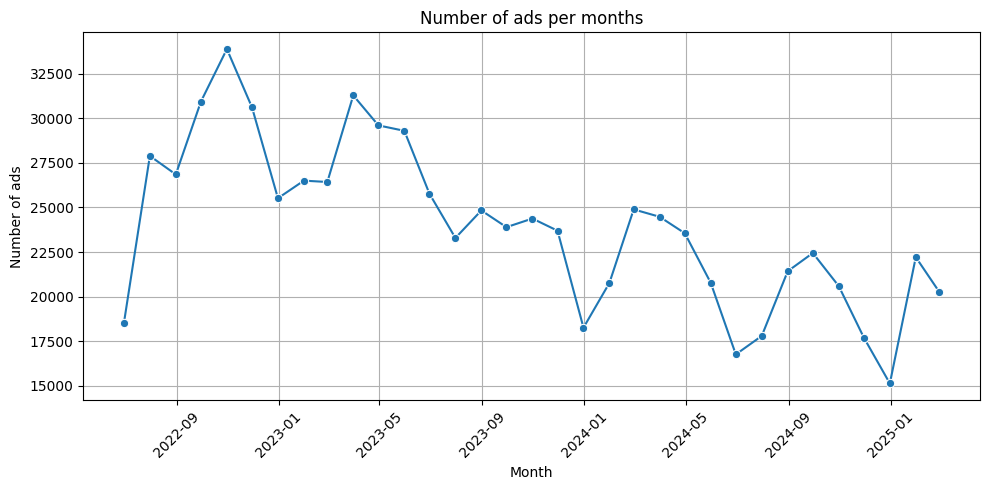

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x='date', y='record_count', marker='o')
plt.title('Number of ads per months')
plt.xlabel('Month')
plt.ylabel('Number of ads')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

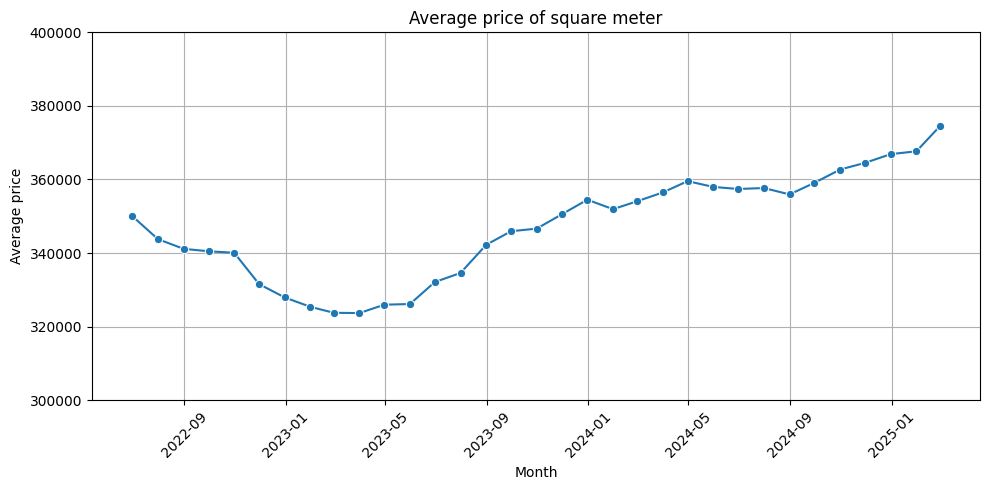

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_stats, x='date', y='avg_sqm_price', marker='o')
plt.title('Average price of square meter')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(300000, 400000)
plt.show()

In [45]:
df2

,date,avg_sqm_price,record_count
0,2022-06-30,350039.849858,18518
1,2022-07-31,343763.925321,27891
2,2022-08-31,341137.818013,26852
3,2022-09-30,340477.859320,30942
4,2022-10-31,340066.505793,33888
5,2022-11-30,331544.908967,30618
6,2022-12-31,327918.300460,25518
7,2023-01-31,325364.691902,26505
8,2023-02-28,323755.323957,26429
9,2023-03-31,323674.966195,31287


In [46]:
df2['avg_sqm_price'].max() - df2['avg_sqm_price'].min()

50736.76604188129

In [47]:
df2

,date,avg_sqm_price,record_count
0,2022-06-30,350039.849858,18518
1,2022-07-31,343763.925321,27891
2,2022-08-31,341137.818013,26852
3,2022-09-30,340477.859320,30942
4,2022-10-31,340066.505793,33888
5,2022-11-30,331544.908967,30618
6,2022-12-31,327918.300460,25518
7,2023-01-31,325364.691902,26505
8,2023-02-28,323755.323957,26429
9,2023-03-31,323674.966195,31287


In [48]:
df = pd.read_excel('RC_F01_03_2022_T19_04_2025 (2).xlsx')

c:\users\фатих айдын\tf_env\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [49]:
df_usd = df

In [50]:
df_usd = df_usd[['data', 'curs']]

In [51]:
import pandas as pd

df_usd['data'] = pd.to_datetime(df_usd['data'])

df_usd.set_index('data', inplace=True)

monthly_avg_usd = df_usd.resample('M').mean().reset_index()

monthly_avg_usd.rename(columns={'curs': 'avg_usd'}, inplace=True)

df_usd = monthly_avg_usd
df_usd

C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_17484\2597139373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['data'] = pd.to_datetime(df_usd['data'])


,data,avg_usd
0,2022-03-31,103.470045
1,2022-04-30,77.899186
2,2022-05-31,63.312741
3,2022-06-30,57.178557
4,2022-07-31,58.221400
5,2022-08-31,60.391918
6,2022-09-30,59.821500
7,2022-10-31,61.115843
8,2022-11-30,60.852995
9,2022-12-31,65.814987


In [52]:
df_usd = df_usd.rename(columns={'data':'date'})
df_usd.head()

,date,avg_usd
0,2022-03-31,103.470045
1,2022-04-30,77.899186
2,2022-05-31,63.312741
3,2022-06-30,57.178557
4,2022-07-31,58.221400


In [53]:
df3 = pd.merge(df2, df_usd, how='inner', on='date')
df3

,date,avg_sqm_price,record_count,avg_usd
0,2022-06-30,350039.849858,18518,57.178557
1,2022-07-31,343763.925321,27891,58.221400
2,2022-08-31,341137.818013,26852,60.391918
3,2022-09-30,340477.859320,30942,59.821500
4,2022-10-31,340066.505793,33888,61.115843
5,2022-11-30,331544.908967,30618,60.852995
6,2022-12-31,327918.300460,25518,65.814987
7,2023-01-31,325364.691902,26505,68.875975
8,2023-02-28,323755.323957,26429,72.782750
9,2023-03-31,323674.966195,31287,76.103586


In [54]:
df = pd.read_excel('Инфляция и ключевая ставка Банка России_F01_03_2022_T18_04_2025.xlsx')
df.head()

c:\users\фатих айдын\tf_env\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г",Цель по инфляции
0,3.2025,21.0,10.34,4
1,2.2025,21.0,10.06,4
2,1.2025,21.0,9.92,4
3,12.2024,21.0,9.52,4
4,11.2024,21.0,8.88,4


In [55]:
df['Дата'] = df['Дата'].astype(str)
df['Дата'] = pd.to_datetime('1.' + df['Дата'], format='%d.%m.%Y')

df['Дата'] = df['Дата'] + pd.offsets.MonthEnd(0)

df

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г",Цель по инфляции
0,2025-03-31,21.0,10.34,4
1,2025-02-28,21.0,10.06,4
2,2025-01-31,21.0,9.92,4
3,2024-12-31,21.0,9.52,4
4,2024-11-30,21.0,8.88,4
5,2024-10-31,21.0,8.54,4
6,2024-09-30,19.0,8.63,4
7,2024-08-31,18.0,9.05,4
8,2024-07-31,18.0,9.13,4
9,2024-06-30,16.0,8.59,4


In [56]:
df = df.rename(columns={'Дата': 'date',
                       'Ключевая ставка, % годовых': 'key_rate',
                       'Инфляция, % г/г': 'inflation_rate'})

df = df[['date', 'key_rate', 'inflation_rate']]
df.head(1)

,date,key_rate,inflation_rate
0,2025-03-31,21.0,10.34


In [57]:
df4 = pd.merge(df3, df, how='inner', on='date')

In [58]:
df4

,date,avg_sqm_price,record_count,avg_usd,key_rate,inflation_rate
0,2022-06-30,350039.849858,18518,57.178557,9.5,15.90
1,2022-07-31,343763.925321,27891,58.221400,8.0,15.10
2,2022-08-31,341137.818013,26852,60.391918,8.0,14.30
3,2022-09-30,340477.859320,30942,59.821500,7.5,13.68
4,2022-10-31,340066.505793,33888,61.115843,7.5,12.63
5,2022-11-30,331544.908967,30618,60.852995,7.5,11.98
6,2022-12-31,327918.300460,25518,65.814987,7.5,11.94
7,2023-01-31,325364.691902,26505,68.875975,7.5,11.77
8,2023-02-28,323755.323957,26429,72.782750,7.5,10.99
9,2023-03-31,323674.966195,31287,76.103586,7.5,3.51


In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df4['avg_sqm_price'])

print('ADF statistic:', result[0])
print('p-value:', result[1])

ADF statistic: 0.6952287839391209
p-value: 0.9897421692871335


In [63]:
from statsmodels.tsa.stattools import kpss
stat, p_value, _, _ = kpss(df4['avg_sqm_price'], regression='c')
print(f'KPSS statistic: {stat}')
print(f'p-value: {p_value}')

KPSS statistic: 0.5820573353250713
p-value: 0.02426751497044806


In [64]:
df4['diff'] = df4.avg_sqm_price.diff()
df4['diff_2'] = df4.avg_sqm_price.diff().diff()

In [65]:
df4 = df4.dropna()
df4

,date,avg_sqm_price,record_count,avg_usd,key_rate,inflation_rate,diff,diff_2
2,2022-08-31,341137.818013,26852,60.391918,8.0,14.30,-2626.107308,3649.817230
3,2022-09-30,340477.859320,30942,59.821500,7.5,13.68,-659.958693,1966.148615
4,2022-10-31,340066.505793,33888,61.115843,7.5,12.63,-411.353527,248.605166
5,2022-11-30,331544.908967,30618,60.852995,7.5,11.98,-8521.596826,-8110.243299
6,2022-12-31,327918.300460,25518,65.814987,7.5,11.94,-3626.608507,4894.988319
7,2023-01-31,325364.691902,26505,68.875975,7.5,11.77,-2553.608559,1072.999948
8,2023-02-28,323755.323957,26429,72.782750,7.5,10.99,-1609.367945,944.240614
9,2023-03-31,323674.966195,31287,76.103586,7.5,3.51,-80.357762,1529.010183
10,2023-04-30,325950.610687,29605,80.995543,7.5,2.31,2275.644492,2356.002254
11,2023-05-31,326136.909938,29300,79.212595,7.5,2.51,186.299252,-2089.345241


In [66]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df4['diff'].dropna())

print('ADF statistic:', result[0])
print('p-value:', result[1])

ADF statistic: -3.325819656222613
p-value: 0.01376305269049356


In [67]:
from statsmodels.tsa.stattools import kpss
stat, p_value, _, _ = kpss(df4['diff'].dropna(), regression='c')
print(f'KPSS statistic: {stat}')
print(f'p-value: {p_value}')

KPSS statistic: 0.3203115959331254
p-value: 0.1


C:\Users\Фатих Айдын\AppData\Local\Temp\ipykernel_17484\880014469.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(df4['diff'].dropna(), regression='c')


### checking for seasonality

In [68]:
df4

,date,avg_sqm_price,record_count,avg_usd,key_rate,inflation_rate,diff,diff_2
2,2022-08-31,341137.818013,26852,60.391918,8.0,14.30,-2626.107308,3649.817230
3,2022-09-30,340477.859320,30942,59.821500,7.5,13.68,-659.958693,1966.148615
4,2022-10-31,340066.505793,33888,61.115843,7.5,12.63,-411.353527,248.605166
5,2022-11-30,331544.908967,30618,60.852995,7.5,11.98,-8521.596826,-8110.243299
6,2022-12-31,327918.300460,25518,65.814987,7.5,11.94,-3626.608507,4894.988319
7,2023-01-31,325364.691902,26505,68.875975,7.5,11.77,-2553.608559,1072.999948
8,2023-02-28,323755.323957,26429,72.782750,7.5,10.99,-1609.367945,944.240614
9,2023-03-31,323674.966195,31287,76.103586,7.5,3.51,-80.357762,1529.010183
10,2023-04-30,325950.610687,29605,80.995543,7.5,2.31,2275.644492,2356.002254
11,2023-05-31,326136.909938,29300,79.212595,7.5,2.51,186.299252,-2089.345241


In [69]:
df4['diff']

2    -2626.107308
3     -659.958693
4     -411.353527
5    -8521.596826
6    -3626.608507
7    -2553.608559
8    -1609.367945
9      -80.357762
10    2275.644492
11     186.299252
12    5974.893673
13    2469.758392
14    7660.029920
15    3683.083699
16     715.869263
17    3862.200048
18    3989.368447
19   -2567.834979
20    2144.215180
21    2396.106995
22    3079.103287
23   -1573.643867
24    -556.954521
25     257.360721
26   -1732.735452
27    3153.792081
28    3615.323389
29    1802.898487
30    2374.336708
31     782.632336
32    6745.018491
Name: diff, dtype: float64

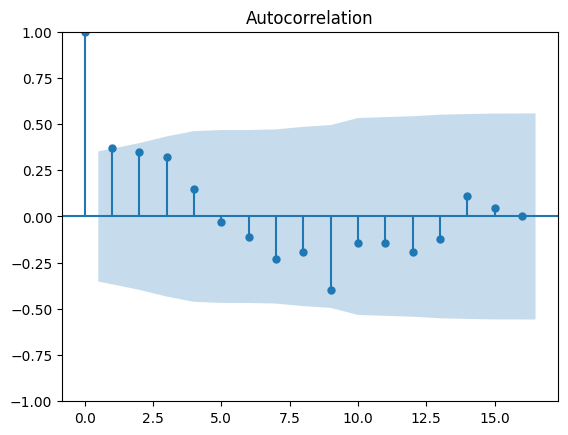

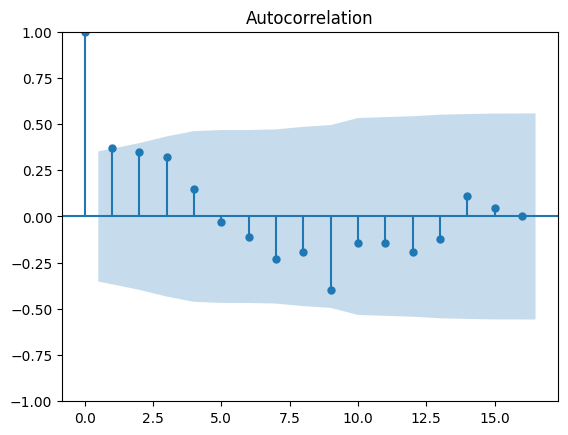

In [70]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df4['diff'].dropna(), lags=16)

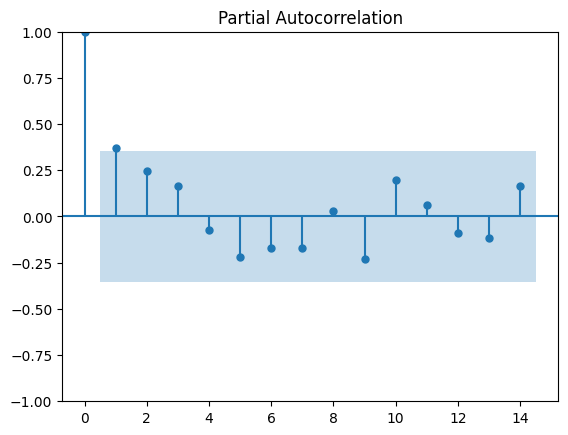

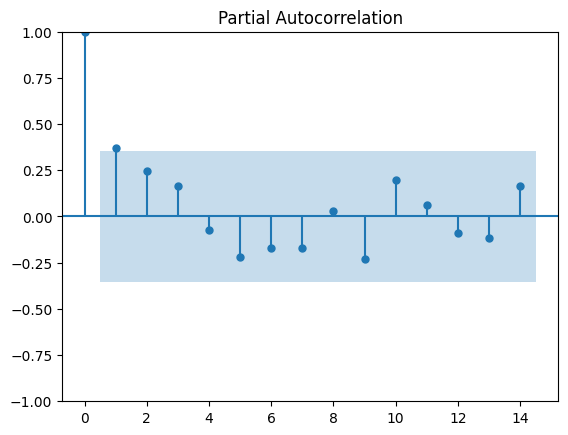

In [71]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df4['diff'].dropna(), lags=14)

In [72]:
df5 = df4.dropna().reset_index(drop=True)
df5

,date,avg_sqm_price,record_count,avg_usd,key_rate,inflation_rate,diff,diff_2
0,2022-08-31,341137.818013,26852,60.391918,8.0,14.30,-2626.107308,3649.817230
1,2022-09-30,340477.859320,30942,59.821500,7.5,13.68,-659.958693,1966.148615
2,2022-10-31,340066.505793,33888,61.115843,7.5,12.63,-411.353527,248.605166
3,2022-11-30,331544.908967,30618,60.852995,7.5,11.98,-8521.596826,-8110.243299
4,2022-12-31,327918.300460,25518,65.814987,7.5,11.94,-3626.608507,4894.988319
5,2023-01-31,325364.691902,26505,68.875975,7.5,11.77,-2553.608559,1072.999948
6,2023-02-28,323755.323957,26429,72.782750,7.5,10.99,-1609.367945,944.240614
7,2023-03-31,323674.966195,31287,76.103586,7.5,3.51,-80.357762,1529.010183
8,2023-04-30,325950.610687,29605,80.995543,7.5,2.31,2275.644492,2356.002254
9,2023-05-31,326136.909938,29300,79.212595,7.5,2.51,186.299252,-2089.345241


# Modeling

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
ts = df5['avg_sqm_price']

In [75]:
train, test = ts[:-5], ts[-5:]

In [76]:
model = ARIMA(train, order=(0, 2, 1))
fitted_model = model.fit()

In [77]:
forecast = fitted_model.forecast(steps=5)

In [78]:
forecast = fitted_model.forecast(steps=5)

In [79]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 1467.8378
RMSE: 1983.7934


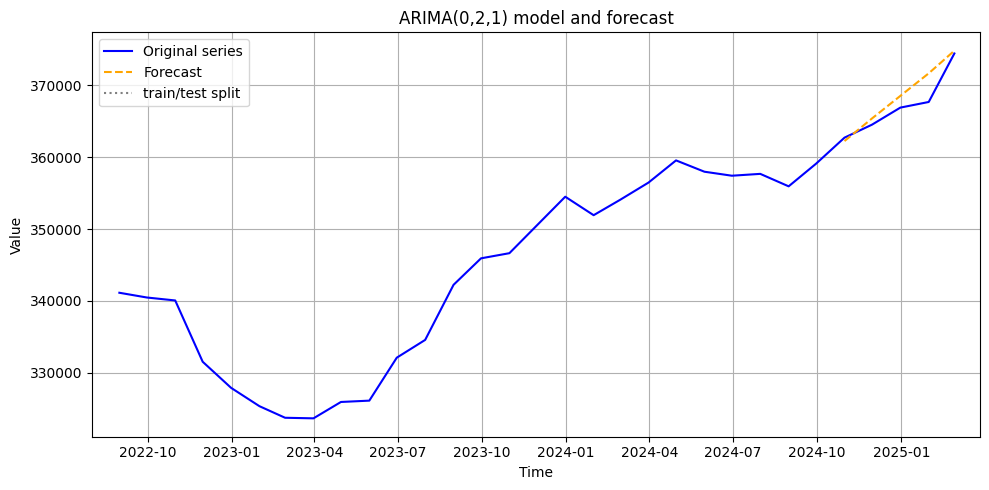

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(df5.date, ts, label="Original series", color="blue")
plt.plot(df5.date[-5:], forecast, label="Forecast", color="orange", linestyle="--")
plt.axvline(x=test.index[0], color='gray', linestyle=':', label='train/test split')
plt.legend()
plt.title("ARIMA(0,2,1) model and forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.xlim(pd.to_datetime("2022-08"), df5.date.max() + pd.DateOffset(months=1))
plt.show()

In [83]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


train = ts[:-5]
test = ts[-5:]

results = []

for p in range(3):
    for d in [1, 2]:
        for q in range(3):
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()

                forecast = model_fit.forecast(steps=len(test))

                mae = mean_absolute_error(test, forecast)
                mape = mean_absolute_percentage_error(test, forecast)
                mse = mean_squared_error(test, forecast)
                rmse = np.sqrt(mse)

                results.append({
                    'p': p,
                    'd': d,
                    'q': q,
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic,
                    'MAE': mae,
                    'MAPE': mape,
                    'MSE': mse,
                    'RMSE': rmse
                })

            except Exception as e:
                print(f"Model ({p},{d},{q}) failed: {e}")
                continue

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')

results_df

c:\users\фатих айдын\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,p,d,q,AIC,BIC,MAE,MAPE,MSE,RMSE
4,0,2,1,469.145834,471.501942,1467.837766,0.003998,3.935436e+06,1983.793439
9,1,2,0,467.047177,469.403284,1468.226808,0.003999,3.936862e+06,1984.152776
3,0,2,0,464.461153,465.639207,1501.687932,0.004090,4.062345e+06,2015.525922
17,2,2,2,465.424829,471.315098,1688.935914,0.004596,4.777990e+06,2185.861353
16,2,2,1,463.839928,468.552143,1801.327695,0.004900,5.302118e+06,2302.632827
11,1,2,2,464.164481,468.876696,1803.969746,0.004907,5.310825e+06,2304.522722
15,2,2,0,465.304476,468.838637,1914.897713,0.005207,5.846617e+06,2417.977880
5,0,2,2,464.256816,467.790977,1914.876769,0.005207,5.847692e+06,2418.200136
10,1,2,1,461.689765,465.223927,2384.630841,0.006476,8.585706e+06,2930.137576
0,0,1,0,479.472217,480.691092,8144.300835,0.022063,8.227888e+07,9070.770380


In [84]:
results_df.to_excel('arima_auto.xlsx')

### distribution of the residuals

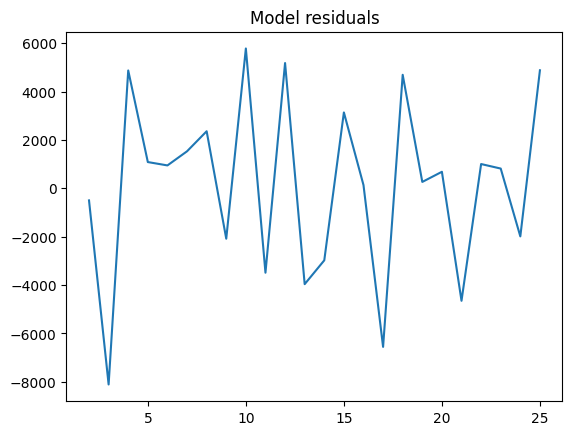

In [86]:
import matplotlib.pyplot as plt

residuals = fitted_model.resid
plt.plot(residuals[2:])
plt.title('Model residuals')
plt.show()

In [87]:
from scipy.stats import shapiro
stat, p = shapiro(residuals[2:])
print("p-value:", p)

p-value: 0.414652943611145


In [88]:
from statsmodels.stats.stattools import jarque_bera
stat, p, _, _ = jarque_bera(residuals[2:])
print("p-value:", p)

p-value: 0.636844885319192


### Autocorrelation of the residuals

In [89]:
#Автокорреля
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals[2:], lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,6.493638,0.261103


# heteroscedasticity

In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

In [91]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
import matplotlib.pyplot as plt

residuals = fitted_model.resid

arch_test = het_arch(residuals[2:])

arch_statistic, arch_pvalue, _, _ = arch_test

print(f"ARCH test statistic: {arch_statistic}")
print(f"ARCH test p-value: {arch_pvalue}")


ARCH test statistic: 1.8722176718427508
ARCH test p-value: 0.7592466162662004


## The forecast for the future period

In [92]:
model = ARIMA(ts, order=(0, 2, 1))
fitted_model = model.fit()

In [93]:
forecast = fitted_model.forecast(steps=5)

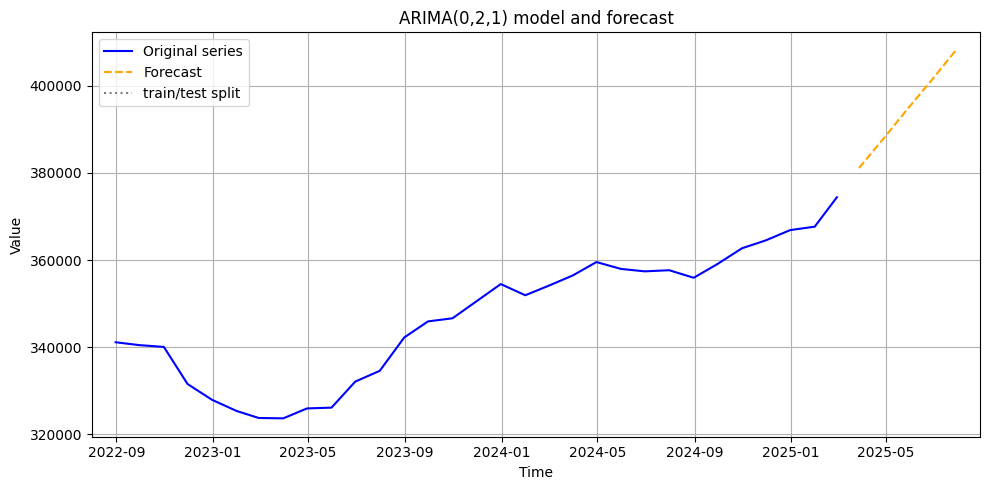

In [94]:
pred_list = [df5.date.max() + pd.DateOffset(months=1), df5.date.max() + pd.DateOffset(months=2),
            df5.date.max() + pd.DateOffset(months=3), df5.date.max() + pd.DateOffset(months=4),
            df5.date.max() + pd.DateOffset(months=5)]

pred_df = pd.DataFrame(pred_list, columns=['date'])

plt.figure(figsize=(10, 5))
plt.plot(df5.date, ts, label="Original series", color="blue")
plt.plot(pred_df.date, forecast, label="Forecast", color="orange", linestyle="--")
plt.axvline(x=test.index[0], color='gray', linestyle=':', label='train/test split')
plt.legend()
plt.title("ARIMA(0,2,1) model and forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.xlim(pd.to_datetime("2022-08"), df5.date.max() + pd.DateOffset(months=6))
plt.show()

# ARIMAX

In [123]:
df6 = df5[['date', 'avg_sqm_price', 'record_count', 'avg_usd', 'key_rate', 'inflation_rate']]
df6

,date,avg_sqm_price,record_count,avg_usd,key_rate,inflation_rate
0,2022-08-31,341137.818013,26852,60.391918,8.0,14.30
1,2022-09-30,340477.859320,30942,59.821500,7.5,13.68
2,2022-10-31,340066.505793,33888,61.115843,7.5,12.63
3,2022-11-30,331544.908967,30618,60.852995,7.5,11.98
4,2022-12-31,327918.300460,25518,65.814987,7.5,11.94
5,2023-01-31,325364.691902,26505,68.875975,7.5,11.77
6,2023-02-28,323755.323957,26429,72.782750,7.5,10.99
7,2023-03-31,323674.966195,31287,76.103586,7.5,3.51
8,2023-04-30,325950.610687,29605,80.995543,7.5,2.31
9,2023-05-31,326136.909938,29300,79.212595,7.5,2.51


In [124]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from itertools import combinations

y = df6['avg_sqm_price']
X = df6[['avg_usd', 'key_rate', 'inflation_rate']]

train_size = len(df6) - 5
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

results = []

def get_best_regressor_combinations(X):
    combinations_list = []
    for r in range(1, len(X.columns) + 1):
        comb = list(combinations(X.columns, r))
        combinations_list.extend(comb)
    return combinations_list

regressor_combinations = get_best_regressor_combinations(X)

for p in range(3):
    for d in [1, 2]:
        for q in range(3):
            for reg_comb in regressor_combinations:
                try:
                    X_train_comb = X_train[list(reg_comb)]
                    X_test_comb = X_test[list(reg_comb)]

                    model = SARIMAX(endog=y_train, exog=X_train_comb, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
                    model_fit = model.fit(disp=False)

                    forecast = model_fit.forecast(steps=len(y_test), exog=X_test_comb)

                    mae = mean_absolute_error(y_test, forecast)
                    mape = mean_absolute_percentage_error(y_test, forecast)
                    mse = mean_squared_error(y_test, forecast)
                    rmse = np.sqrt(mse)

                    results.append({
                        'p': p,
                        'd': d,
                        'q': q,
                        #'regressor_combination': reg_comb, 
                        'regressor_names': list(reg_comb), 
                        'AIC': model_fit.aic,
                        'BIC': model_fit.bic,
                        'MAE': mae,
                        'MAPE': mape,
                        'MSE': mse,
                        'RMSE': rmse
                    })

                except Exception as e:
                    print(f"Model ({p},{d},{q}) with regressor combination {reg_comb} failed: {e}")
                    continue

results_dfx = pd.DataFrame(results)
results_dfx = results_dfx.sort_values(by='RMSE')
results_dfx

c:\users\фатих айдын\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\фатих айдын\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\фатих айдын\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\фатих айдын\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,p,d,q,regressor_names,AIC,BIC,MAE,MAPE,MSE,RMSE
22,0,2,0,[key_rate],446.329966,448.600954,1322.922259,0.003584,2.354913e+06,1534.572557
26,0,2,0,"[key_rate, inflation_rate]",448.329479,451.735961,1328.354561,0.003599,2.358951e+06,1535.887719
23,0,2,0,[inflation_rate],448.174005,450.444994,1529.940461,0.004166,4.171584e+06,2042.445636
41,0,2,2,"[avg_usd, key_rate, inflation_rate]",406.371986,412.639121,1431.602601,0.003842,6.840095e+06,2615.357611
35,0,2,2,[avg_usd],403.632104,407.810194,1560.769798,0.004198,6.974941e+06,2641.011399
...,...,...,...,...,...,...,...,...,...,...
100,2,1,2,[inflation_rate],421.452646,427.998901,6648.957864,0.018010,5.551204e+07,7450.639907
16,0,1,2,[inflation_rate],419.970366,424.334536,6802.485224,0.018420,5.943967e+07,7709.712444
9,0,1,1,[inflation_rate],444.368622,447.775105,6775.313390,0.018340,6.032736e+07,7767.068816
0,0,1,0,[avg_usd],461.931258,464.287366,6349.064629,0.017160,6.071609e+07,7792.052921


In [125]:
results_dfx1 = results_dfx[0:20]

In [126]:
results_dfx1

,p,d,q,regressor_names,AIC,BIC,MAE,MAPE,MSE,RMSE
22,0,2,0,[key_rate],446.329966,448.600954,1322.922259,0.003584,2.354913e+06,1534.572557
26,0,2,0,"[key_rate, inflation_rate]",448.329479,451.735961,1328.354561,0.003599,2.358951e+06,1535.887719
23,0,2,0,[inflation_rate],448.174005,450.444994,1529.940461,0.004166,4.171584e+06,2042.445636
41,0,2,2,"[avg_usd, key_rate, inflation_rate]",406.371986,412.639121,1431.602601,0.003842,6.840095e+06,2615.357611
35,0,2,2,[avg_usd],403.632104,407.810194,1560.769798,0.004198,6.974941e+06,2641.011399
38,0,2,2,"[avg_usd, key_rate]",404.398468,409.621080,1443.441530,0.003873,7.093149e+06,2663.296578
30,0,2,1,[inflation_rate],419.972814,423.245941,2356.073291,0.006375,8.440386e+06,2905.234169
27,0,2,0,"[avg_usd, key_rate, inflation_rate]",448.123010,452.664987,2730.822481,0.007409,8.520600e+06,2919.006694
24,0,2,0,"[avg_usd, key_rate]",446.122972,449.529454,2736.315207,0.007424,8.529168e+06,2920.474013
25,0,2,0,"[avg_usd, inflation_rate]",446.893573,450.300056,2821.780121,0.007668,9.484331e+06,3079.664148


In [127]:
results_dfx.to_excel('res.xlsx')

In [128]:
y = df6['avg_sqm_price']
X = df6[['key_rate']]

train_size = len(df6) - 5
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

In [129]:
model = SARIMAX(endog=y_train, exog=X_train, order=(0, 2, 0), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

In [130]:
mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 1322.9223
RMSE: 1534.5726


### Forecast on test

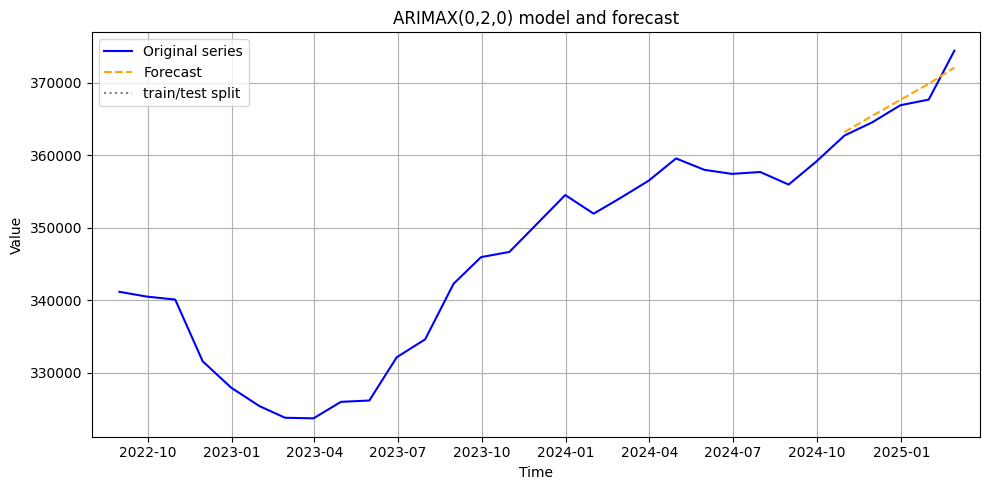

In [131]:
plt.figure(figsize=(10, 5))
plt.plot(df5.date, ts, label="Original series", color="blue")
plt.plot(df5.date[-5:], forecast, label="Forecast", color="orange", linestyle="--")
plt.axvline(x=test.index[0], color='gray', linestyle=':', label='train/test split')
plt.legend()
plt.title("ARIMAX(0,2,0) model and forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.xlim(pd.to_datetime("2022-08"), df5.date.max() + pd.DateOffset(months=1))
plt.show()

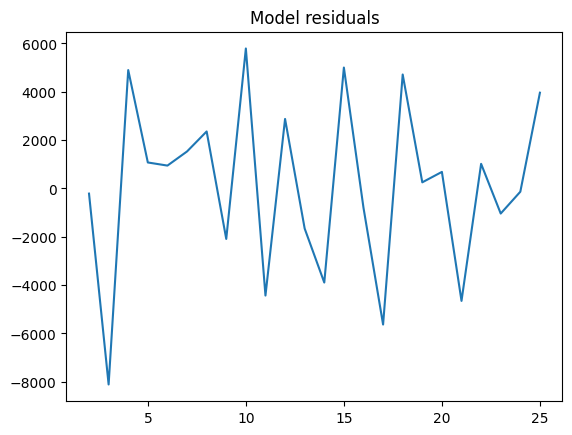

In [132]:
import matplotlib.pyplot as plt

residuals = model_fit.resid
plt.plot(residuals[2:])
plt.title('Model residuals')
plt.show()

In [133]:
from scipy.stats import shapiro
stat, p = shapiro(residuals[2:])
print("p-value:", p)

p-value: 0.6116568446159363


In [134]:
from statsmodels.stats.stattools import jarque_bera
stat, p, _, _ = jarque_bera(residuals[2:])
print("p-value:", p)

p-value: 0.6690756350270277


### Autocorrelation of residuals

In [135]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals[2:], lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,6.343766,0.274191


### Heteroscedacity

In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

In [137]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
import matplotlib.pyplot as plt

residuals = model_fit.resid

arch_test = het_arch(residuals[2:])

arch_statistic, arch_pvalue, _, _ = arch_test

print(f"ARCH test statistic: {arch_statistic}")
print(f"ARCH test p-value: {arch_pvalue}")

ARCH test statistic: 1.8820824807568348
ARCH test p-value: 0.7574356547414506


### The future forecast

In [138]:
X_test

,key_rate
26,21.0
27,21.0
28,21.0
29,21.0
30,21.0


In [139]:

model = SARIMAX(endog=y, exog=X, order=(0, 2, 0), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(y_test), exog=X_test) #assumption of the same key rate

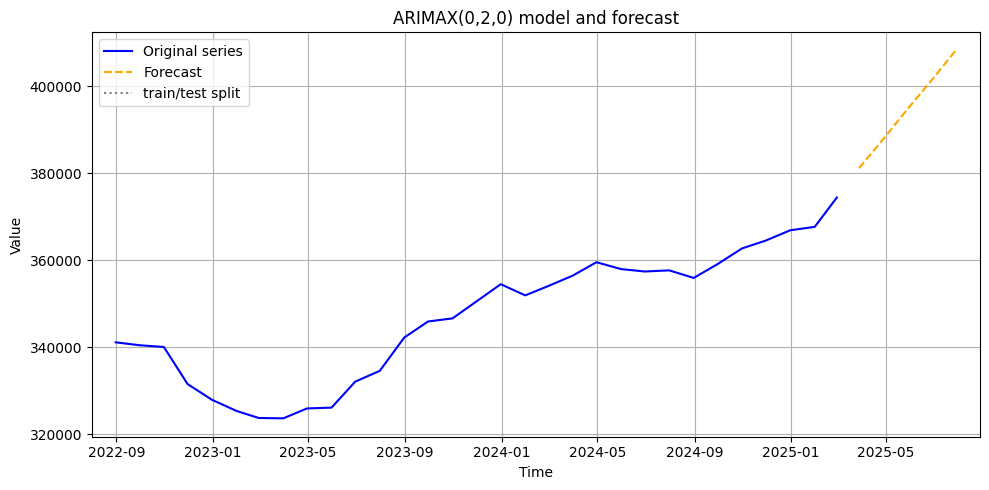

In [140]:
pred_list = [df5.date.max() + pd.DateOffset(months=1), df5.date.max() + pd.DateOffset(months=2),
            df5.date.max() + pd.DateOffset(months=3), df5.date.max() + pd.DateOffset(months=4),
            df5.date.max() + pd.DateOffset(months=5)]

pred_df = pd.DataFrame(pred_list, columns=['date'])

plt.figure(figsize=(10, 5))
plt.plot(df5.date, y, label="Original series", color="blue")
plt.plot(pred_df.date, forecast, label="Forecast", color="orange", linestyle="--")
plt.axvline(x=test.index[0], color='gray', linestyle=':', label='train/test split')
plt.legend()
plt.title("ARIMAX(0,2,0) model and forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.xlim(pd.to_datetime("2022-08"), df5.date.max() + pd.DateOffset(months=6))
plt.show()

In [146]:
#key_rate = 19%

In [147]:
X_test_2 = pd.DataFrame({'key_rate': [19] * 5})

In [148]:

model = SARIMAX(endog=y, exog=X, order=(0, 2, 0), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)


forecast = model_fit.forecast(steps=len(y_test), exog=X_test_2) #assumption of the same key rate

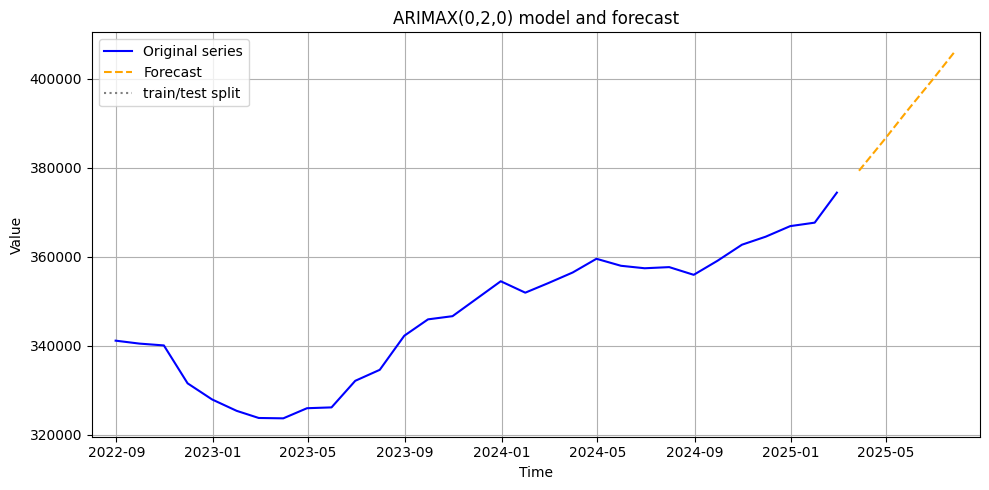

In [149]:
pred_list = [df5.date.max() + pd.DateOffset(months=1), df5.date.max() + pd.DateOffset(months=2),
            df5.date.max() + pd.DateOffset(months=3), df5.date.max() + pd.DateOffset(months=4),
            df5.date.max() + pd.DateOffset(months=5)]

pred_df = pd.DataFrame(pred_list, columns=['date'])

plt.figure(figsize=(10, 5))
plt.plot(df5.date, y, label="Original series", color="blue")
plt.plot(pred_df.date, forecast, label="Forecast", color="orange", linestyle="--")
plt.axvline(x=test.index[0], color='gray', linestyle=':', label='train/test split')
plt.legend()
plt.title("ARIMAX(0,2,0) model and forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.xlim(pd.to_datetime("2022-08"), df5.date.max() + pd.DateOffset(months=6))
plt.show()